In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
sales_df=pd.read_csv(r"C:\Users\kashr\Downloads\ML projects\big mart sales prediction\Train.csv")

In [3]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
sales_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
#no. of data points and features
sales_df.shape

(8523, 12)

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Categorical value
Item_Identifier, 
Item_Fat_Content, 
Item_Type, 
Outlet_Identifier,  
Outlet_Size,                 
Outlet_Location_Type ,        
Outlet_Type.

In [7]:
#checking for missing values
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling the missing values
mean-- average value(item_weight)

mode-- most repeated value(outlet_size)

In [8]:
#mean value of item_weight column
sales_df['Item_Weight'].mean()

12.857645184135976

In [9]:
#filling the missing values of item_weight column by the mean value
sales_df['Item_Weight'].fillna(sales_df['Item_Weight'].mean(), inplace=True)
#we are taking Item_weight column and filling the missing values by the mean of Item_weight data

C:\Users\kashr\AppData\Local\Temp\ipykernel_17956\1958986694.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df['Item_Weight'].fillna(sales_df['Item_Weight'].mean(), inplace=True)


In [10]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing values of Outlet_size column by mode value of that column

In [11]:
mode_of_outlet_size=sales_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
#here we are taking two columns outlet size and outlet type bcoz they are correlated andThis effectively calculates the mode of 'Outlet_Size' for each 'Outlet_Type'.

In [12]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [13]:
missing_values= sales_df['Outlet_Size'].isnull()

In [14]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [15]:
sales_df.loc[missing_values,'Outlet_Size']=sales_df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [16]:
sales_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

In [17]:
sales_df.describe() #stastical measures about the data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


numerical feautre

In [18]:
sns.set()

C:\Users\kashr\AppData\Local\Temp\ipykernel_17956\3206383529.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

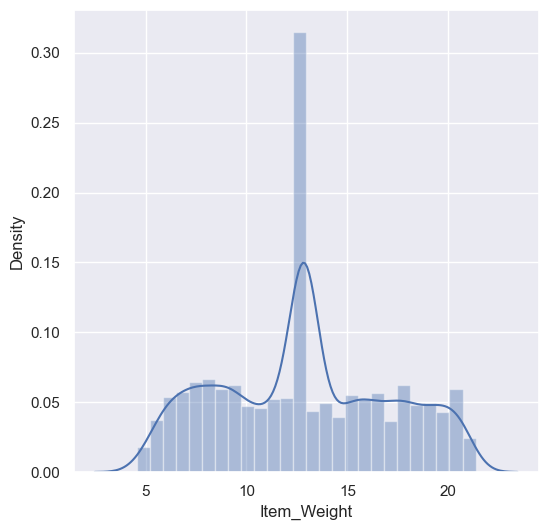

In [19]:
#item_weight distribution
plt.figure(figsize=(6,6))
sns.distplot(sales_df['Item_Weight'])

C:\Users\kashr\AppData\Local\Temp\ipykernel_17956\2142281485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df['Item_Visibility'])


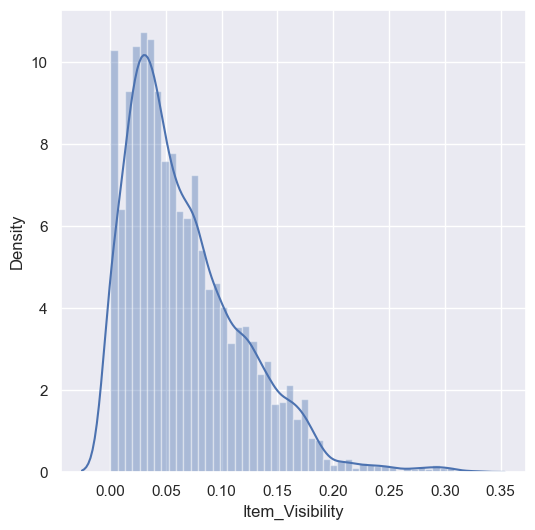

In [20]:
#plotting for item visibility column
plt.figure(figsize=(6,6))
sns.distplot(sales_df['Item_Visibility'])
plt.show()

C:\Users\kashr\AppData\Local\Temp\ipykernel_17956\3531225462.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

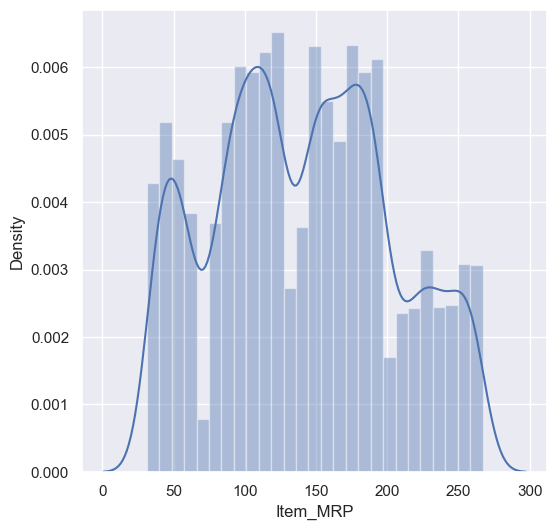

In [21]:
plt.figure(figsize=(6,6))
sns.distplot(sales_df['Item_MRP'])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

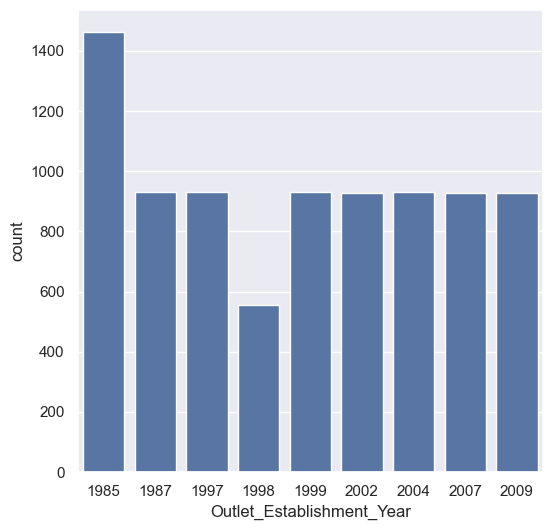

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=sales_df)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

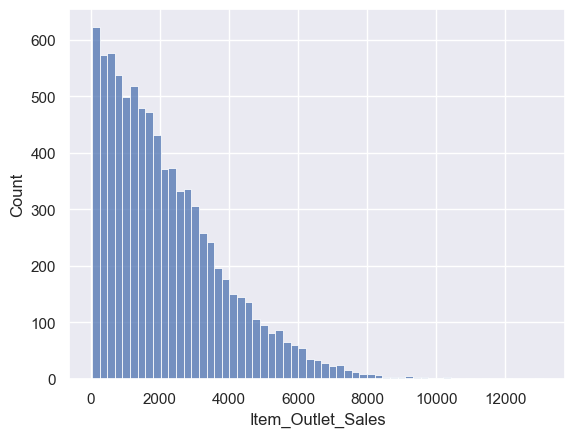

In [26]:
sns.histplot(sales_df['Item_Outlet_Sales'])

Now same we will be plotting for categorical values excluding item idnetifier and outlet_identifier

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

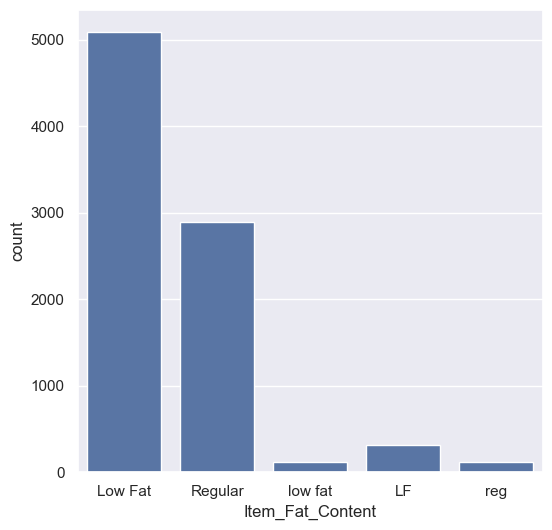

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=sales_df)

<Axes: xlabel='Item_Type', ylabel='count'>

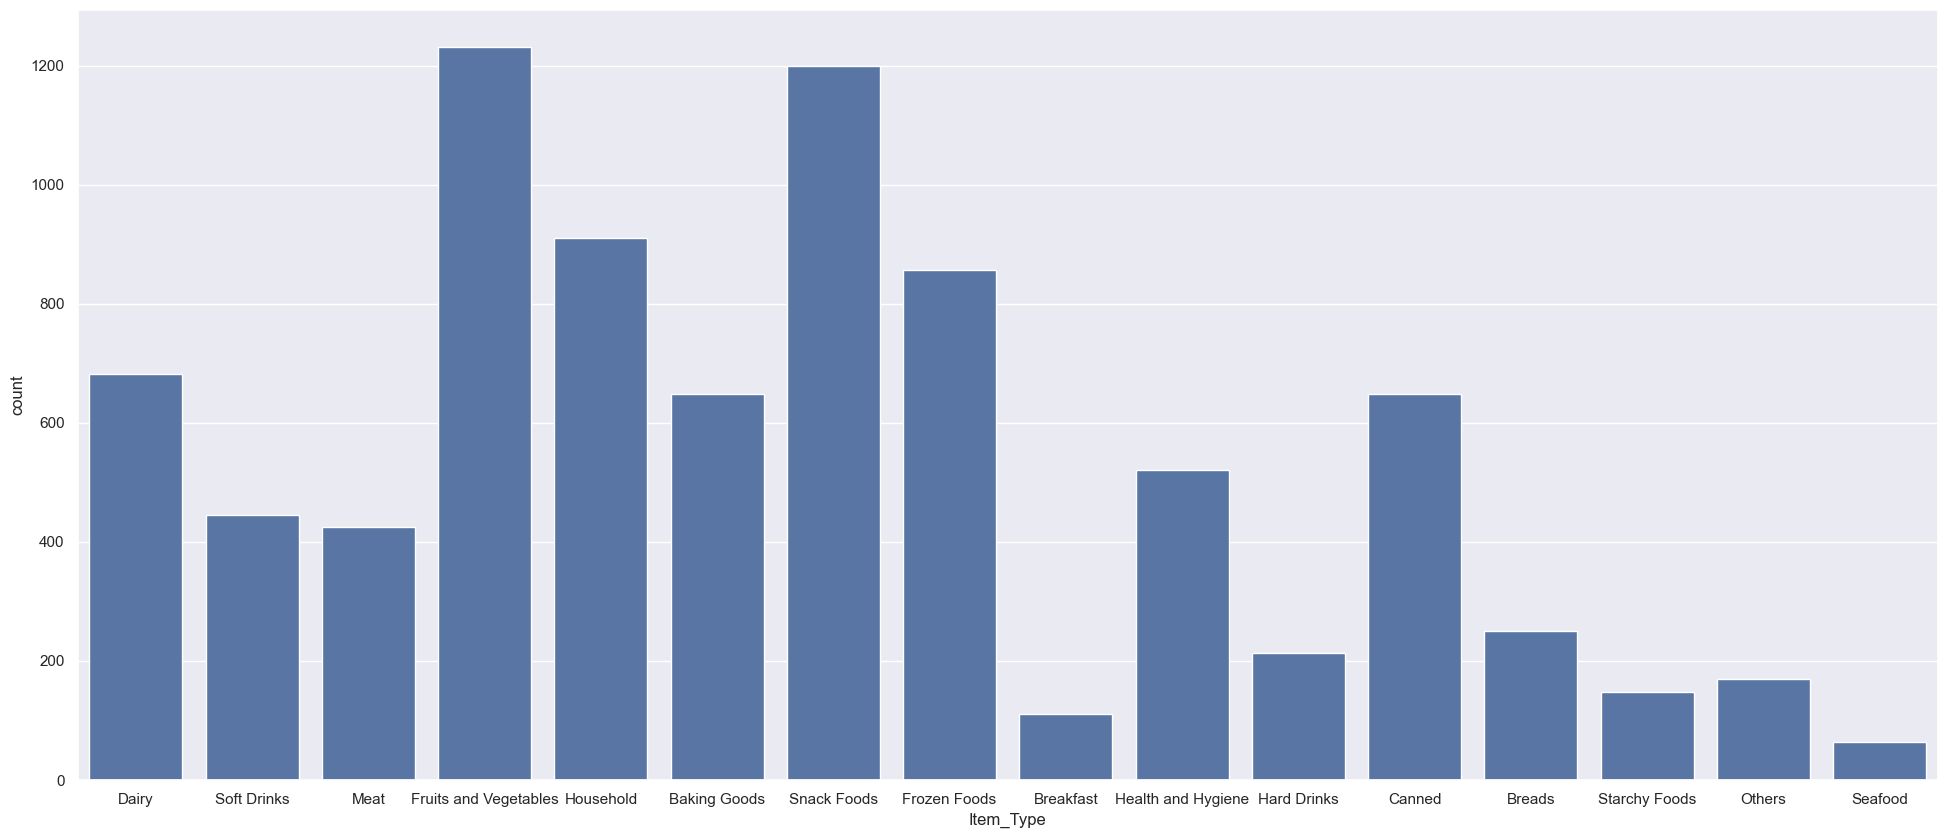

In [38]:
plt.figure(figsize=(24,10))
sns.countplot(x='Item_Type',data=sales_df)

<Axes: xlabel='Outlet_Size', ylabel='count'>

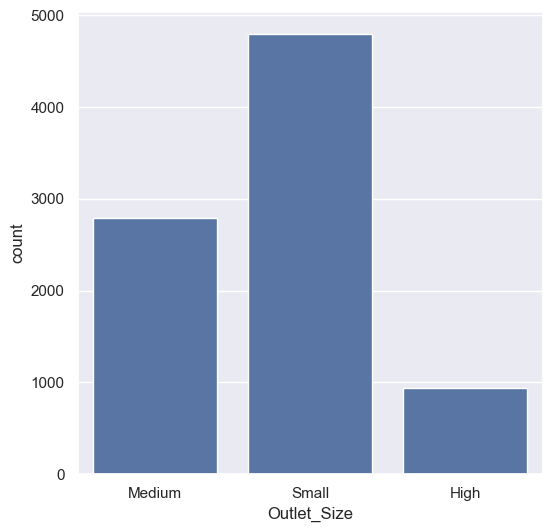

In [39]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=sales_df)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

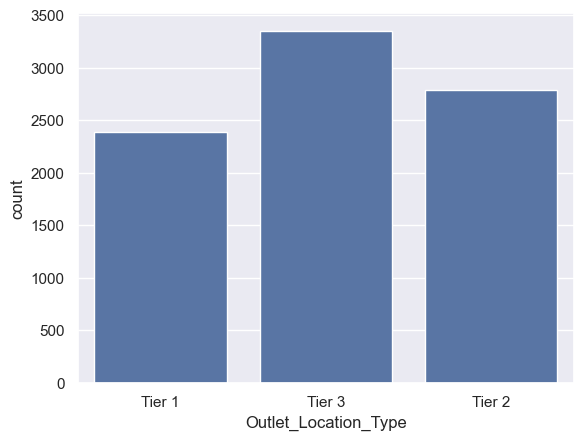

In [41]:
sns.countplot(x='Outlet_Location_Type',data=sales_df)

<Axes: xlabel='Outlet_Type', ylabel='count'>

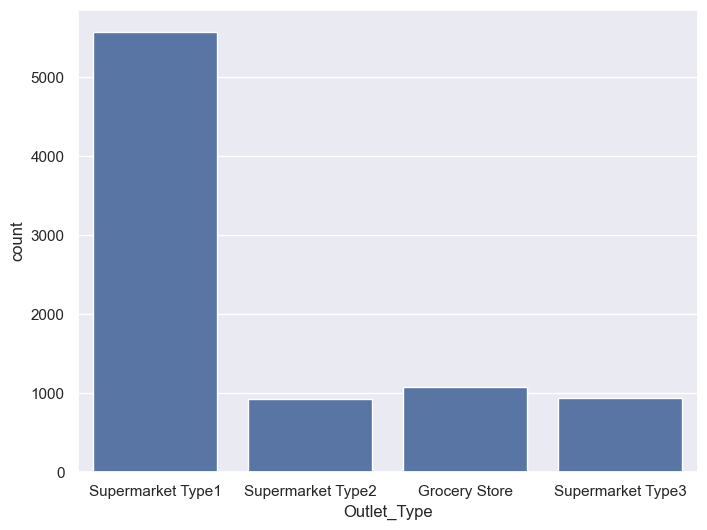

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Type',data=sales_df)

Data preprocessing

In [45]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
sales_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [57]:
#low fat are in three so we need to convert them in one
sales_df.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace=True)

In [58]:
sales_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label encoding


In [60]:
# We are going to take all categorical values(that are string) and transform them into numerical values
encoder=LabelEncoder()

In [66]:
sales_df['Item_Identifier']=encoder.fit_transform(sales_df['Item_Identifier'])
sales_df['Item_Fat_Content']=encoder.fit_transform(sales_df['Item_Fat_Content'])
sales_df['Item_Type']=encoder.fit_transform(sales_df['Item_Type'])
sales_df['Outlet_Identifier']=encoder.fit_transform(sales_df['Outlet_Identifier'])
sales_df['Outlet_Size']=encoder.fit_transform(sales_df['Outlet_Size'])
sales_df['Outlet_Location_Type']=encoder.fit_transform(sales_df['Outlet_Location_Type'])
sales_df['Outlet_Type']=encoder.fit_transform(sales_df['Outlet_Type'])

In [69]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and targets

In [70]:
X=sales_df.drop(columns='Item_Outlet_Sales',axis=1)
Y=sales_df['Item_Outlet_Sales']

In [73]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Now splitting the data into training and testing data

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=2)

In [76]:
X.shape,X_train.shape,X_test.shape

((8523, 11), (6818, 11), (1705, 11))

# Training Machine Learning model

In [77]:
regressor=XGBRegressor()

In [78]:
regressor.fit(X_train,Y_train)  #In the fit we need to mention training data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [80]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)

In [81]:
#Rsquared value
r2_train=metrics.r2_score(Y_train, training_data_prediction)

In [84]:
print('R squared value=', r2_train)

R squared value= 0.8762174618111388


In [85]:
#prediction on testing data
testing_data_prediction=regressor.predict(X_test)

In [86]:
r2_test=metrics.r2_score(Y_test, testing_data_prediction)

In [88]:
print('R squared test value=', r2_test)

R squared test value= 0.5017253991620692
